# Análise de estatísticas dos jogadores da NBA na temporada 24/25

## 1) Lendo os dados

In [21]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('database_player_stats_nba_24_25.csv')
data

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,Emoni Bates,CLE,WAS,W,5.18,0,2,0.000,0,2,...,0,0,2,0,0,0,2,0,-0.8,2025-02-07
16508,A.J. Green,MIL,ATL,L,20.75,1,5,0.200,0,2,...,1,1,1,0,0,0,2,2,-0.9,2025-02-07
16509,Kenrich Williams,OKC,TOR,W,16.70,0,5,0.000,0,3,...,1,3,2,0,0,1,0,0,-1.4,2025-02-07
16510,Tyrese Martin,BRK,MIA,W,20.70,1,5,0.200,0,4,...,5,5,1,0,0,3,2,2,-2.7,2025-02-07


## 2) Obtendo a média de pontos de um jogador

In [5]:
player = input()
select_player = data['Player'] == player

if data[select_player].shape == (0, 25):
    print('Player not found')
else:
    mean_points = data[select_player]['PTS'].mean()
    print(f'{mean_points:.2f}')

 teste


Player not found


## 3) Obtendo jogadores com média de pontos maior que N

In [6]:
dataframe_mean_point_all_players = data[['Player', 'PTS']].groupby(by='Player').mean()

N = float(input("Insert a grade point average reference number: "))
players_above_average = dataframe_mean_point_all_players['PTS'] >= N

dataframe_mean_point_all_players[players_above_average].sort_values(by='PTS', ascending=False)

Insert a grade point average reference number:  27


,PTS
Player,
Shai Gilgeous-Alexander,32.440000
Giannis Antetokounmpo,31.619048
Nikola Jokić,29.695652
Luka Dončić,28.136364
LaMelo Ball,28.031250
Tyrese Maxey,27.840909
Anthony Edwards,27.215686


## 4) Relação entre fazer 30 pontos ou mais e vencer a partida

In [7]:
players_over_30 = data['PTS'] >= 30
result_win = data['Res'] == 'W'

amount_games_player_over_30 = len(data[players_over_30])
amount_games_player_over_30_and_his_team_won = len(data[players_over_30 & result_win])

res = (amount_games_player_over_30_and_his_team_won / amount_games_player_over_30) * 100
print(f'{res:.2f}% of times a player scored over 30 points, his team won.')

60.93% of times a player scored over 30 points, his team won.


## 5) Relação entre atuação individual e vitória (visualização)

In [19]:
data_points_win = {
    "Players scored over": [],
    "% wins": []
}

result_win = data['Res'] == 'W'

for pts in range(20, 60):
    players_over_pts = data['PTS'] >= pts
    
    amount_games_player_over_pts = len(data[players_over_pts])
    amount_games_player_over_pts_and_his_team_won = len(data[players_over_pts & result_win])
    
    win_prob = (amount_games_player_over_pts_and_his_team_won / amount_games_player_over_pts) * 100
    
    data_points_win["Players scored over"].append(pts)
    data_points_win["% wins"].append(win_prob)

pd.DataFrame(data_points_win)

,Players scored over,% wins
0,20,57.331822
1,21,57.727077
2,22,58.145240
3,23,58.803612
4,24,58.591178
5,25,58.677686
6,26,59.079062
7,27,59.718026
8,28,59.101655
9,29,60.439560


<Axes: xlabel='Players scored over', ylabel='% wins'>

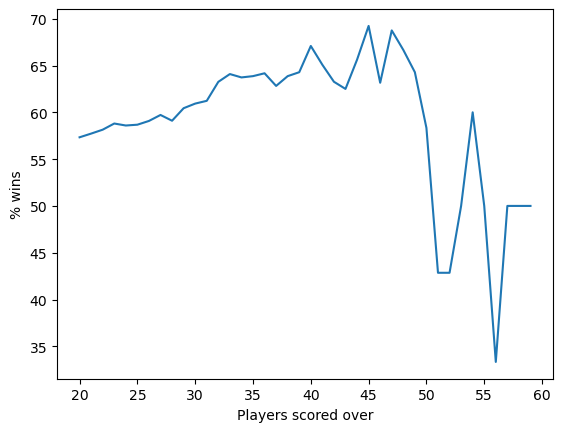

In [22]:
sns.lineplot(x="Players scored over", y="% wins", data=data_points_win)